In [11]:
#Phase 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv(r"C:\Users\rishm\Downloads\customer_analytics.csv")

df.head()
df.describe()
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            255 non-null    int64  
 1   Age                   255 non-null    int64  
 2   Gender                255 non-null    str    
 3   City                  255 non-null    str    
 4   Education             243 non-null    str    
 5   MaritalStatus         255 non-null    str    
 6   AnnualIncome          243 non-null    float64
 7   SpendingScore         255 non-null    int64  
 8   YearsEmployed         255 non-null    int64  
 9   PurchaseFrequency     255 non-null    int64  
 10  OnlineVisitsPerMonth  255 non-null    int64  
 11  ReturnedItems         255 non-null    int64  
 12  PreferredDevice       255 non-null    str    
 13  LastPurchaseAmount    255 non-null    int64  
dtypes: float64(1), int64(8), str(5)
memory usage: 35.6 KB


In [7]:
# Phase 2: Data Cleaning

df.isnull().sum()

df["AnnualIncome"].fillna(df["AnnualIncome"].median(), inplace=True)

df["Education"].fillna("Unknown", inplace=True)

df.drop_duplicates(inplace=True)

df.isnull().sum()

C:\Users\rishm\AppData\Local\Temp\ipykernel_20388\3636346776.py:9: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df["AnnualIncome"].fillna(df["AnnualIncome"].median(), inplace=True)
C:\Users\rishm\AppData\Local\Temp\ipykernel_20388\3636346776.py:12: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series throu

CustomerID               0
Age                      0
Gender                   0
City                     0
Education               12
MaritalStatus            0
AnnualIncome            12
SpendingScore            0
YearsEmployed            0
PurchaseFrequency        0
OnlineVisitsPerMonth     0
ReturnedItems            0
PreferredDevice          0
LastPurchaseAmount       0
dtype: int64

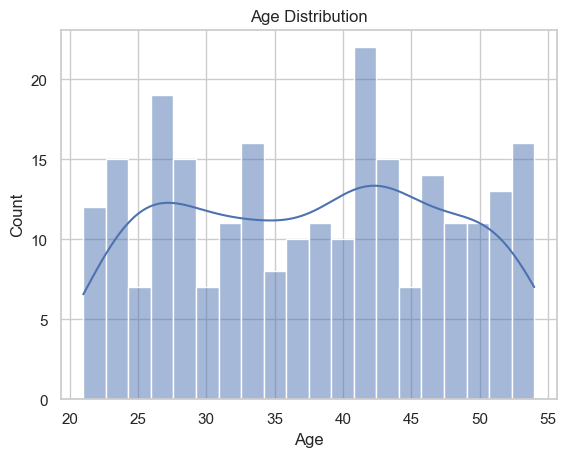

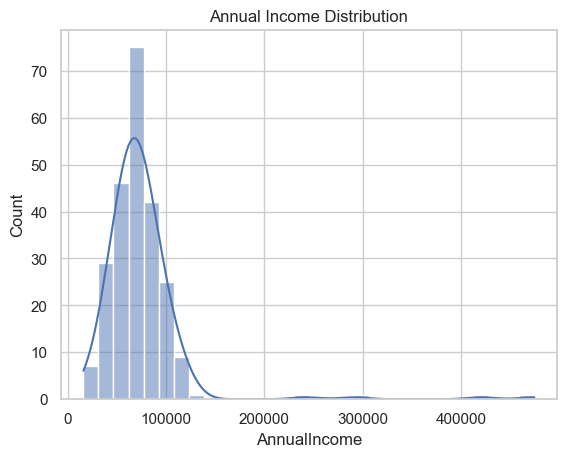

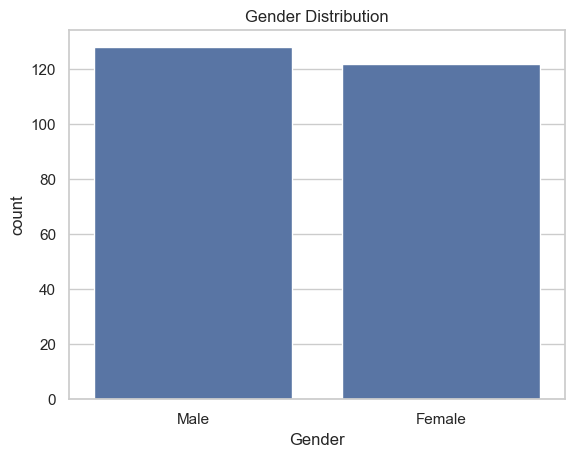

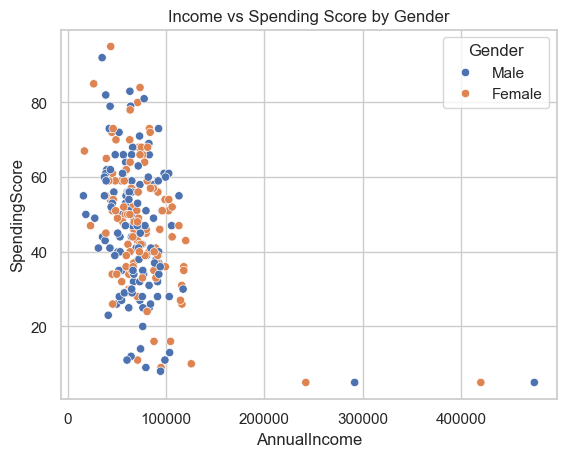

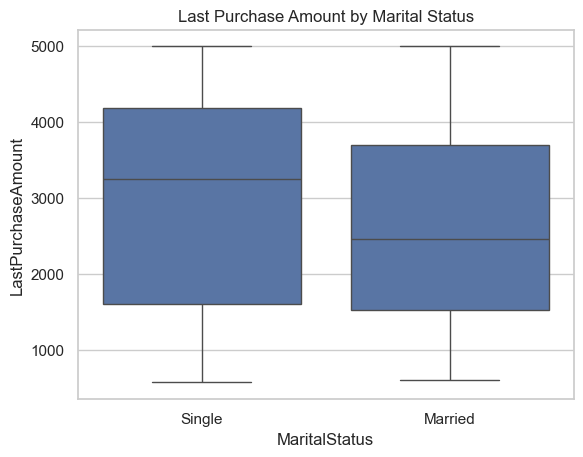

In [8]:
# Phase 3: Univariate & Bivariate Analysis

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

sns.histplot(df["AnnualIncome"], bins=30, kde=True)
plt.title("Annual Income Distribution")
plt.show()

sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")
plt.show()

sns.scatterplot(x="AnnualIncome", y="SpendingScore", hue="Gender", data=df)
plt.title("Income vs Spending Score by Gender")
plt.show()

sns.boxplot(x="MaritalStatus", y="LastPurchaseAmount", data=df)
plt.title("Last Purchase Amount by Marital Status")
plt.show()

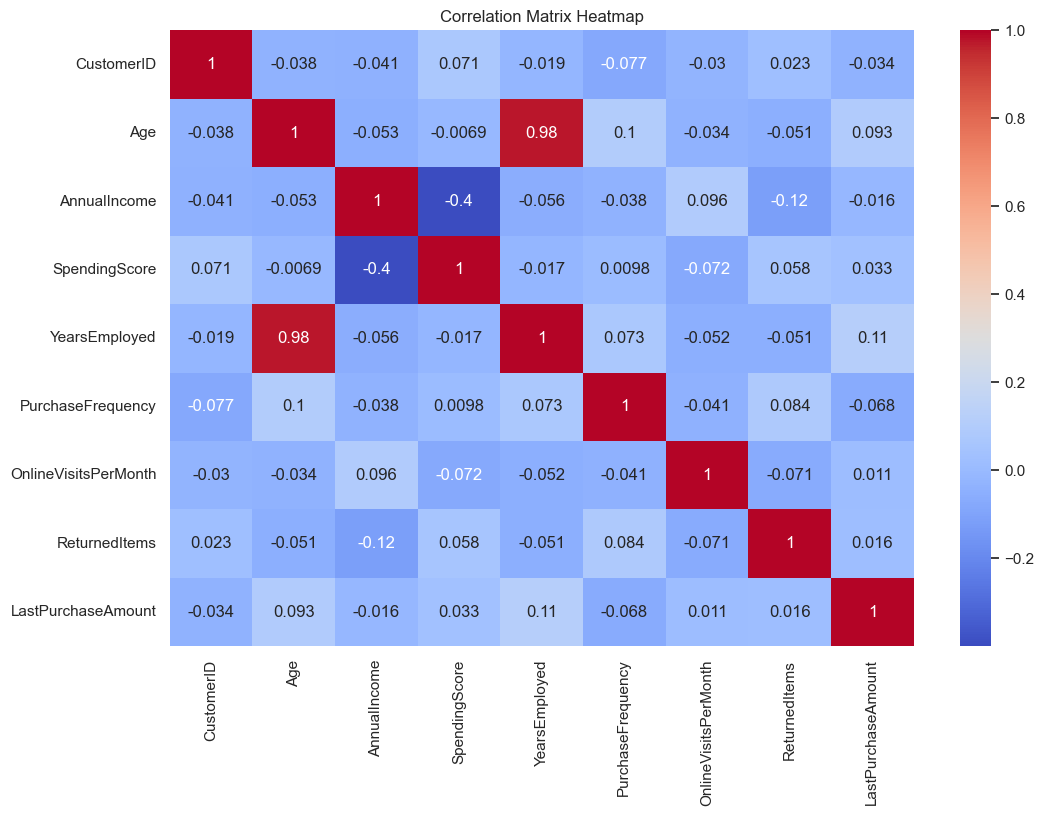

In [9]:
# Phase 4: Multivariate Analysis

plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()